In [2]:
import numpy as np
import matplotlib.pyplot as plt

import lumicks.pylake as lk

%matplotlib inline

In [3]:
import glob
'''This section will allow you to select which Marker h5 file you would like to open'''
dir_root = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\Data_Analysis\Projects\cGAS\2020-10-16 500nM and 4uM cat domain'+'/'
files = glob.glob(dir_root + '*Marker*.h5')
for file in files:
    print(file[len(dir_root):])
file_to_open = dir_root + input("Which file would you like:~copy and paste the file name~")
# fig_name = file_to_open.split('/')[-1][:-3] + '.png'
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

20201016-165457 Marker 4 DNA 7.h5
20201016-175424 Marker 3 DNA 1 500pM protein.h5
20201016-180129 Marker 7 DNA 3 500nM cat domain.h5
20201016-181031 Marker 10 DNA 5 force clamp 1 settings 4uM protein WEIRD STUFF.h5
20201016-181331 Marker 2 DNA 6.h5
20201016-182135 Marker 12 DNA 8.h5
20201016-182705 Marker 13 DNA 9.h5
Which file would you like:~copy and paste the file name~20201016-181331 Marker 2 DNA 6.h5


# FD curves

[Download this page as a Jupyter notebook](_downloads/d7aaccf00285f8d991251d8012a64fa9/fdcurves.ipynb)

The following code loads an HDF5 file and lists all of the FD curves inside of it:

In [4]:
import lumicks.pylake as lk

file = lk.File(file_to_open)
list(file.fdcurves)  # e.g. shows: "['baseline', '1', '2']"

['12 DNA 6',
 '13 2pN force clamp in the buffer channel',
 '14 potentially i clamped at 2pN in the 500nM channel',
 '15 DNA 6 2pN clamp p10 i0 d0 step5nm f200Hz',
 '16 DNA 6 FD curve pt5 um per sec return 1pt5 um per sec',
 '17 DNA 6 FD curve same conditions',
 '18 DNA 6 FD curve same conditions',
 '19 DNA 6 FD to 2pN distance',
 '20 DNA 6 second 2pN force clamp',
 '21 DNA 6 FD curve after 2nd force clamp',
 '22 DNA 6 attempt to engage 5pN force clamp before',
 '24 DNA 6 attempt to engage 5pN force clamp',
 '25',
 '26',
 '27']

To visualizes an FD curve, you can use the built-in `.plot_scatter()` function:

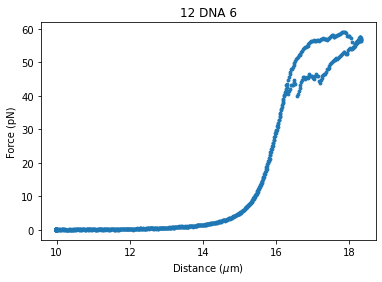

In [12]:
# Pick a single FD curve
fd = file.fdcurves['12 DNA 6']
fd.plot_scatter()

Here, `.fdcurves` is a standard Python dictionary, so we can do standard `dict` thing with it. For example, we can iterate over all the FD curve in a file and plot them:

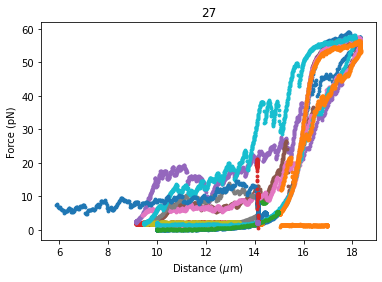

In [7]:
for name, fd in file.fdcurves.items():
    fd.plot_scatter()
    plt.savefig(name)

By default, the FD channel pair is `downsampled_force2` and `distance1`. This assumes that the force extension was done by moving trap 1, which is the most common. In that situation the force measured by trap 2 is more precise because that trap is static. The channels can be switched with the following code:

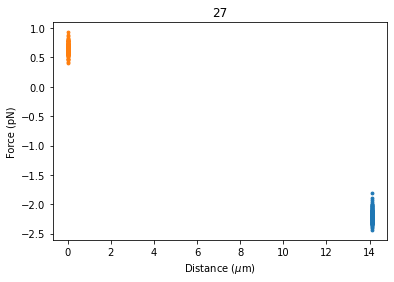

In [10]:
alt_fd = fd.with_channels(force='2x', distance='1')
alt_fd.plot_scatter()

# or as quick one-liner for plotting
fd.with_channels(force='2y', distance='2').plot_scatter()

The raw data can be accessed as well:

AttributeError: module 'lumicks.pylake' has no attribute 'odijk'

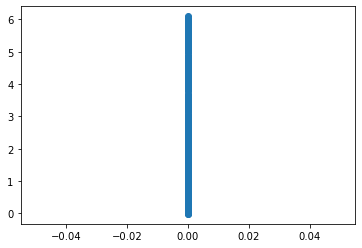

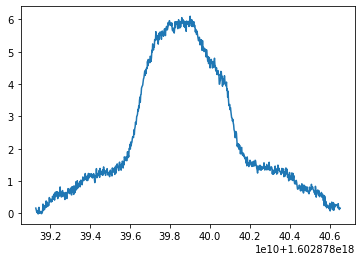

In [19]:
# Access the raw data: default force and distance channels
force = fd.f
distance = fd.d

# Access the raw data: specific channels
force = fd.downsampled_force1y
distance = fd.distance2
fig = plt.figure()
# Plot manually: FD curve
plt.scatter(distance.data, force.data)
fig = plt.figure()

# Plot manually: force timetrace
plt.plot(force.timestamps, force.data)


In [22]:
# %matplotlib widget

fdcurves = file.fdcurves
selector = lk.FdRangeSelector(fdcurves)

AttributeError: module 'lumicks.pylake' has no attribute 'FdRangeSelector'